<a href="https://colab.research.google.com/github/JonasSouza871/Estudo_machine_learning/blob/main/2.Arvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados do projeto

----------------

In [94]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


- Nesse novo conjunto de dados temos as milhas por ano, o ano do modelo, o preço e se ele conseguiu ser vendido ou não.

- O primeiro passo é mudar a coluna de milhas_por ano, temos que mudar para quilometros por ano, para entender melhor o problema

In [95]:
dados["km_por_ano"] = dados["milhas_por_ano"]*1.60934
dados

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290
...,...,...,...,...,...
9995,15572,2006,97112.86,0,25060.64248
9996,13246,2002,107424.63,1,21317.31764
9997,13018,2014,93856.99,0,20950.38812
9998,10464,2011,51250.57,1,16840.13376


- Outro problema é saber quantos anos o carro rodou, pois so tem o ano dele.
- para saber isso, teremos que pegar a data de hoje e subtrair pelo ano de origem para sabe a idade aproximada do carro

In [96]:
dados["idade"] = 2025 - dados['ano_do_modelo'] #Dada de hoje - ideade do modelo
dados

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,25
1,7843,1998,40557.96,1,12622.05362,27
2,7109,2006,89627.50,0,11440.79806,19
3,26823,2015,95276.14,0,43167.32682,10
4,7935,2014,117384.68,1,12770.11290,11
...,...,...,...,...,...,...
9995,15572,2006,97112.86,0,25060.64248,19
9996,13246,2002,107424.63,1,21317.31764,23
9997,13018,2014,93856.99,0,20950.38812,11
9998,10464,2011,51250.57,1,16840.13376,14


In [97]:
dados.drop(["milhas_por_ano","ano_do_modelo"], axis=1, inplace= True) #retira as colunas milhas por ano e ano do modelo
# uso do axis 1 para indicar que é para tirar apenas as colunas e não as linhas
# se fosse para tirar a linhas utilizariamos o axis = 0
# o inplace true serve para indicar para manter o lugar.
dados.head(5)

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,25
1,40557.96,1,12622.05362,27
2,89627.50,0,11440.79806,19
3,95276.14,0,43167.32682,10
4,117384.68,1,12770.11290,11


In [98]:
x = dados[['preco', 'km_por_ano', 'idade']]
y = dados[['vendido']]

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 213

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler() # Nova escala
scaler.fit(raw_treino_x)  #treina para nova escala

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 70.72%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Acuracia do modelo foi de quase 71% com o modelo linear SVC

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 213

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler() # Nova escala
scaler.fit(raw_treino_x)  #treina para nova escala

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia foi de 76.08%


-  Com o modelo SVC a acuracia foi de 76,08% superior ao modelo linear.

# Dummy classifiers e SVC
---------------------

In [101]:
vendidos = len(dados.query("vendido==True")) # Quantidades de carros vendidos.

In [102]:
totais = len(dados) #Quantidade de dados totais

In [103]:
acuracia_base = (vendidos)/totais #Se alguem chutar que todos os carros foram vendidos ela terá essa acuracia, que seria a acuracia base de chute.
print(acuracia_base)

0.58


- Utilizando o DummyClassifier

In [104]:
from sklearn.dummy import DummyClassifier
classificador = DummyClassifier()
classificador.fit(treino_x,treino_y)
previsoes = classificador.predict(teste_x)
acuracia = accuracy_score(teste_y,previsoes)
print(acuracia)


0.58


- O valor do dummyclassifier de acuracia de treino deu o mesmo valor que achamos anteriomente, ou seja,  os valores batem.
- DummyClassifier -> acuracia de base do modelo.
- Ele pega o modelo que mais aparece e aplica como se todos os dados tivessem dado isso.


# Arvore de decisão

-----------

- Modelo de aprendizado supervisionado para classificação ou regressão, que divide dados recursivamente com base em regras (nós) que maximizam a pureza (ex: entropia, Gini). Cada nó interno representa uma decisão sobre um atributo, os ramos são possíveis valores, e as folhas indicam o resultado. A construção prioriza divisões que reduzem impureza.

In [105]:
from sklearn.tree import DecisionTreeClassifier

SEED = 213

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler() # Nova escala
scaler.fit(raw_treino_x)  #treina para nova escala

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 72.00%


- Utilizando a arvore de decisão a acuracia foi de 72%

In [106]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(modelo)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[0] <= -0.197\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="x[0] <= -0.983\\ngini = 0.196\\nsamples = 3241\\nvalue = [357, 2884]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1452\\nvalue = [0, 1452]"] ;\n1 -> 2 ;\n3 [label="x[1] <= 1.606\\ngini = 0.319\\nsamples = 1789\\nvalue = [357, 1432]"] ;\n1 -> 3 ;\n4 [label="x[0] <= -0.941\\ngini = 0.309\\nsamples = 1658\\nvalue = [317, 1341]"] ;\n3 -> 4 ;\n5 [label="x[0] <= -0.969\\ngini = 0.425\\nsamples = 88\\nvalue = [27.0, 61.0]"] ;\n4 -> 5 ;\n6 [label="x[0] <= -0.979\\ngini = 0.32\\nsamples = 35\\nvalue = [7, 28]"] ;\n5 -> 6 ;\n7 [label="x[1] <= 0.577\\ngini = 0.5\\nsamples = 12\\nvalue = [6, 6]"] ;\n6 -> 7 ;\n8 [label="x[0] <= -0.979\\ngini = 0.444\\nsamples = 9\\nvalue = [3, 6]"] ;\n7 -> 8 ;\n9 [label="x[2] <= 1.103\\ngini = 0.245\\nsamples = 7\\nvalue = [1, 6

- ele me devolve a estrutura da arvore

In [107]:
estrutura = export_graphviz(modelo)
grafico = graphviz.Source(estrutura)
grafico

- Arvore com decisoes que foram feitas.

- configurando a quantidade de profundidade da arvore:

In [108]:
from sklearn.tree import DecisionTreeClassifier

SEED = 213

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler() # Nova escala
scaler.fit(raw_treino_x)  #treina para nova escala

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = DecisionTreeClassifier(max_depth= 3) #Modelo de arvore de decisão
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 78.24%


- com 3 tivemos uma acuracia maior

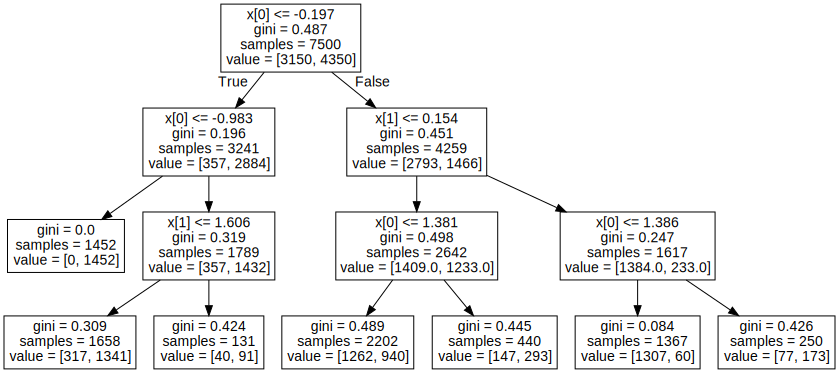

In [109]:
estrutura = export_graphviz(modelo)
grafico = graphviz.Source(estrutura)
grafico

- Proximo passo é melhorar a visualização dos graficos para ficar melhor para entender

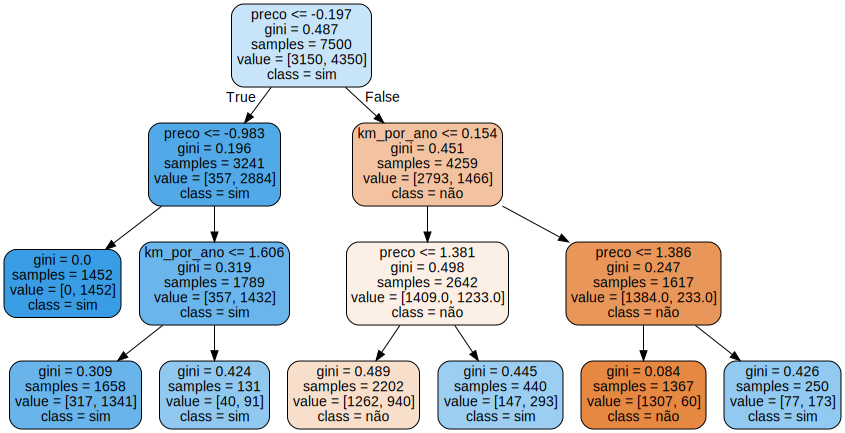

In [110]:
estrutura = export_graphviz(modelo,filled = True,
                            rounded = True,
                            feature_names = x.columns,#para aparecer os nomes das colunas nas features.
                            class_names=["não","sim"])  #Adicionando nome na classe de saida, 0 -> nao, 1 -> sim
grafico = graphviz.Source(estrutura)
grafico

- Quanto maior a cor azul mais ele tende para 1
- Note que os valores sao estranhos, por que estao em uma nova escala apartir de calculos de media e desvio padrão.
- Por isso não é tao interessante a visualização com o StandardScaler()

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 78.24%


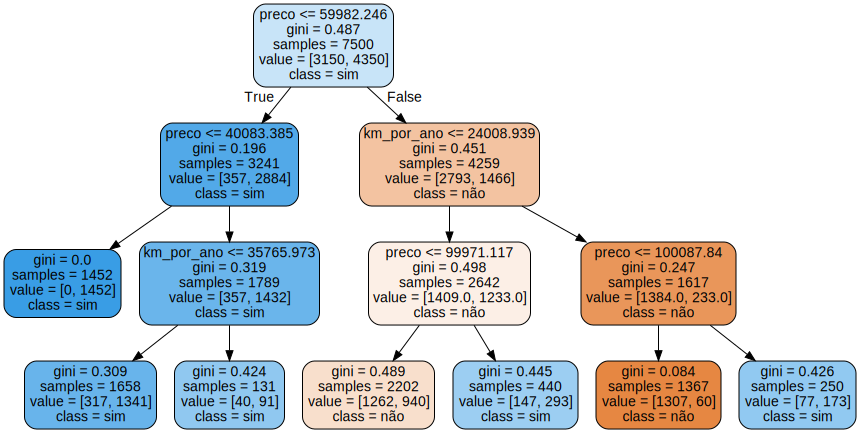

In [112]:
from sklearn.tree import DecisionTreeClassifier

SEED = 213

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")


#scaler = StandardScaler() # Nova escala
#scaler.fit(raw_treino_x)  #treina para nova escala

#treino_x = scaler.transform(raw_treino_x)
#teste_x = scaler.transform(raw_teste_x)


modelo = DecisionTreeClassifier(max_depth= 3) #Modelo de arvore de decisão
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

estrutura = export_graphviz(modelo,filled = True,
                            rounded = True,
                            feature_names = x.columns,#para aparecer os nomes das colunas nas features.
                            class_names=["não","sim"])  #Adicionando nome na classe de saida, 0 -> nao, 1 -> sim
grafico = graphviz.Source(estrutura)
grafico

- Agora aparecem os valores reais normais dos dados sem escala.
- Bem explicado agora, temos o comportamento completo da arvore.